# Project description

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan is more profitable.
<hr>
Description of the plans
<br>
<br>
<b>Surf</b>
<br>
Monthly charge: \$20
<ul>
    <li>500 monthly minutes</li>
    <li>50 texts</li>
    <li>15 GB of data</li>
</ul>
After exceeding the package limits: 1. 1 minute: 3 cents (Megaline always rounds up to the nearest minute and megabyte. If the call lasted just one second, it will be counted as one minute.) 2. 1 text message: 3 cents 3. 1 GB of data: \$10
<br>
<br>
<b>Ultimate</b>
<br>
Monthly charge: \$70
<ul>
    <li>3000 monthly minutes</li>
    <li>1000 text messages</li>
    <li>30 GB of data</li>
</ul>
After exceeding the package limits: 1. 1 minute: 1 cent 2. 1 text message: 1 cent 3. 1 GB of data: \$7

## Step 1: Open the data and study the general information

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

At first, let's look at the several rows of the each table and look at the tabels' info

In [3]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
calls.tail()

,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [7]:
internet.tail()

,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [9]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [10]:
messages.tail()

,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [13]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [14]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [15]:
users.tail()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Conclusion

Tables' ids are formated like user_id + entry id of this user in all traffic tables.
For example 1000_21 in messages table means twenty first message from user with id is 1000.

Users ids' range = 1000 to 1499

There are missing value only in the churn_date column in the users table. But it means that these users were still Megaline clients

There's information about zero duration calls in the task description. We can suppose that these are missing cals or may be these are calls with less than 1 second duration.

But if Megaline's duration measurement precision is only one second it's not justify to round it up to 1 second and then to one minute call, because we will calculate upper bound of user profit. I think that we need to calculate lower bound of users' monthly profit, because it's better to see the **'pessimistic'** big picture.

Also there are some zero traffic web session in the internet table, but if in calls case zero duration might mean missing calls, I don't know anything about 'missing sessions' so I suppose these sessions have used less than 1 megabyte of data and we should round it up to 1 megabyte.

We should consider two cases: 

1. Zero duration is missed calls
2. Zero duration is less than 1 second calls

## Step 2: Prepare the data

To do our analysis more careful let's convert data types and eliminate some errors in data

In [17]:
# Let's convert all date columns to the datetime type
def get_datetime_columns(table):
    datetime_columns = []
    
    for column in table.columns:
        # All the tables have 'date' substring
        if 'date' in column:
            datetime_columns.append(column)
            
    return datetime_columns

def convert_tables_date(tables, format):
    for table in tables:
        for column in get_datetime_columns(table):
            table[column] = pd.to_datetime(table[column], format=format, errors='coerce')

In [18]:
tables = {
    'calls': calls, 
    'internet': internet, 
    'messages': messages,
    'plans': plans,
    'users': users}
convert_tables_date(tables.values(), format='%Y-%m-%d')

In [19]:
# Let's check
for table_name, table in tables.items():
    for column in get_datetime_columns(table):
        print('{} - {} - {}'.format(table_name, column, table[column].dtype))

calls - call_date - datetime64[ns]
internet - session_date - datetime64[ns]
messages - message_date - datetime64[ns]
users - reg_date - datetime64[ns]
users - churn_date - datetime64[ns]


In [20]:
# Create class for table description. It helps us in monitoring table's descriptive statistics, unique values etc.
class TableDescription:
    def __init__(self, table, name):
        self.table = table
        self.name = name
        self.column_types = {
            'object' : self.print_string_columns_info,
            'float64' : self.print_number_columns_info,
            'int64' : self.print_number_columns_info,
            'datetime64[ns]': self.print_datetime_columns_info,
        }
        
    def print_columns_info(self, col_type='object'):
        self.column_types[col_type](col_type)
    
    def print_string_columns_info(self, col_type):
        for column in self.get_col_type_columns(col_type):
            print(self.table[column].value_counts())
            print('-'*30)
        
    def print_number_columns_info(self, col_type):
        for column in self.get_col_type_columns(col_type):
            print(self.table[column].describe())
            print('-'*30)
        
    def print_datetime_columns_info(self, col_type):
        for column in self.get_col_type_columns(col_type):
            print(self.table[column].describe())
            print('-'*30)
    
    def get_col_type_columns(self, col_type):
        columns = []
        
        for column in self.table.columns:
            if self.table[column].dtype == col_type:
                columns.append(column)
                
        return columns


In [21]:
# Create description for every table
descriptions = [TableDescription(table, table_name) for table_name, table in tables.items()]

In [22]:
description_types = ['object', 'datetime64[ns]']

In [23]:
def print_tables_descriptions(descriptions, description_types):
    for description in descriptions:
        print('{} table description'.format(description.name))
        print('-'*30)
        for description_type in description_types:
            print('description type:{}'.format(description_type))
            print('-'*30)
            description.print_columns_info(col_type=description_type)

In [24]:
print_tables_descriptions(descriptions, description_types)

calls table description
------------------------------
description type:object
------------------------------
1257_574    1
1390_500    1
1251_643    1
1488_448    1
1082_222    1
           ..
1494_414    1
1370_378    1
1280_529    1
1313_354    1
1240_67     1
Name: id, Length: 137735, dtype: int64
------------------------------
description type:datetime64[ns]
------------------------------
count                  137735
unique                    351
top       2018-12-27 00:00:00
freq                     1091
first     2018-01-15 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object
------------------------------
internet table description
------------------------------
description type:object
------------------------------
1435_65     1
1157_130    1
1371_138    1
1069_152    1
1042_120    1
           ..
1122_412    1
1453_75     1
1001_275    1
1467_10     1
1240_67     1
Name: id, Length: 104825, dtype: int64
------------------------------
description type:datetim

In [25]:
# Now let's see the tables number columns descriptions
calls.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,137735.0,1247.658046,139.416268,1000.0,1128.00,1247.00,1365.00,1499.0
duration,137735.0,6.745927,5.839241,0.0,1.29,5.98,10.69,37.6


In [26]:
internet.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,104825.0,1242.496361,142.053913,1000.0,1122.00,1236.00,1367.00,1499.00
mb_used,104825.0,366.713701,277.170542,0.0,136.08,343.98,554.61,1693.47


In [27]:
messages.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,76051.0,1245.972768,139.843635,1000.0,1123.0,1251.0,1362.0,1497.0


In [28]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,45.486,16.972269,18.0,30.00,46.0,61.00,75.0


- We see that the duration column in the calls table have min value 0 and we should take a look at the distribution of this column.

- Also the observation period is from January 15, 2018 to December 31, 2018

- Min value of the mb_used column in the internet table is 0, so we should look at the column a bit closer

- First churn client was in July 31, 2018

In [29]:
# Let's check missing calls ratio
missing_calls = calls.query('duration == duration.min()')
print('The number of the missing calls: {}'.format(missing_calls.shape[0]))
print('The missing calls ratio: {}'.format(missing_calls.shape[0] / calls.shape[0]))

The number of the missing calls: 26834
The missing calls ratio: 0.1948233927469416


In [30]:
missing_calls.head()

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0


In [31]:
# Let's look a bit closer at the missing calls
missing_calls_stat = missing_calls['user_id'].value_counts()

In [32]:
# How many users have missing calls?
missing_calls_stat.shape[0]

478

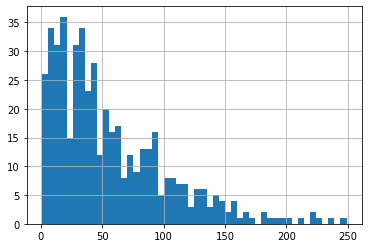

In [33]:
# Let's check missing calls distribution
missing_calls_stat.hist(bins=50)

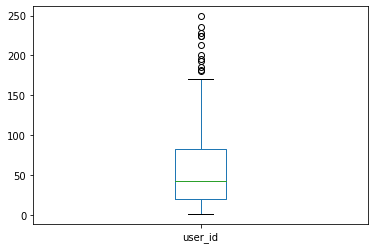

In [34]:
# Let's plot a boxplot
missing_calls_stat.plot.box()

In [35]:
missing_calls_stat.describe()

count    478.000000
mean      56.138075
std       46.988310
min        1.000000
25%       20.000000
50%       42.000000
75%       82.000000
max      249.000000
Name: user_id, dtype: float64

We see that the median number of the missing calls is 42. But the mean value is the 56 which means that we have the right skewed distribution, also boxplot says about it.

It looks like Poisson distribution, where we count events for a certain period of time (for a month in the case)

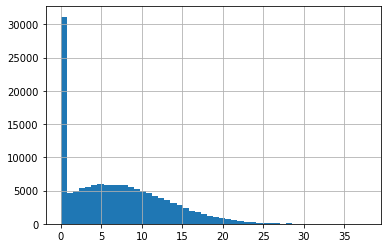

In [36]:
# Let's look at the duration distribution with and without missing calls
calls['duration'].hist(bins=50)

We see that there's a high outlier column that will interfere to our EDA so we don't take into account the missing calls.

My assumption is a missing call is almost always called back, so the missing calls are disturbed through the remaining distribution. And if some missing calls weren't called back, so it doesn't matter is there any of these or not.

In [37]:
no_missing_calls = calls.query('duration != duration.min()')

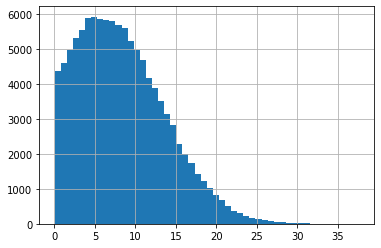

In [38]:
no_missing_calls['duration'].hist(bins=50)

In [39]:
no_missing_calls['duration'].describe()

count    110901.000000
mean          8.378196
std           5.354567
min           0.010000
25%           4.150000
50%           7.710000
75%          11.820000
max          37.600000
Name: duration, dtype: float64

Now the min value of the duration column is 0.01 of minute (0.6 of second!). It seems like spam, telephone bullies or scammers. Or may be it could be taxi calls or something like this. Nevertheless now we try to calculate user usage statistics, so we will not deal any assumption about this calls.

Also it's strange because original assumption about calls measurements precision has been that Megaline can measure calls with precision to seconds.

I don't think that it could be measurments error. My assumption is that Megaline measure calls durations more precise than just seconds. 

But let's assume that zero duration calls might be less than Megaline precision and compare descriptive statistics of two populations to quench our curiosity.

Now let's condider internet table and mb_used column

In [40]:
# Let's check zero traffic ratio
zero_traffic_internet = internet.query('mb_used == mb_used.min()')
print('The number of the zero traffic sessions: {}'.format(zero_traffic_internet.shape[0]))
print('The zero traffic sessions ratio: {}'.format(zero_traffic_internet.shape[0] / internet.shape[0]))

The number of the zero traffic sessions: 13747
The zero traffic sessions ratio: 0.1311423801574052


In [41]:
zero_traffic_internet_stat = zero_traffic_internet['user_id'].value_counts()

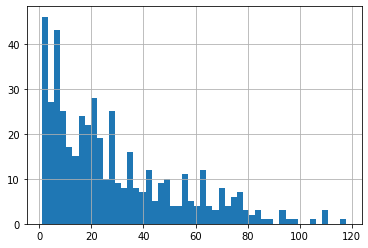

In [42]:
zero_traffic_internet_stat.hist(bins=50)

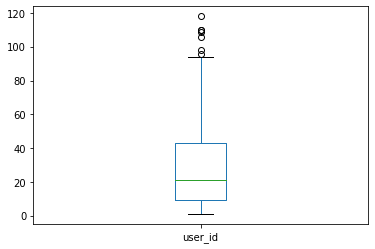

In [43]:
zero_traffic_internet_stat.plot.box()

In [44]:
zero_traffic_internet_stat.describe()

count    477.000000
mean      28.819706
std       24.586347
min        1.000000
25%        9.000000
50%       21.000000
75%       43.000000
max      118.000000
Name: user_id, dtype: float64

Again the median number of the zero sessions is less than the mean value.

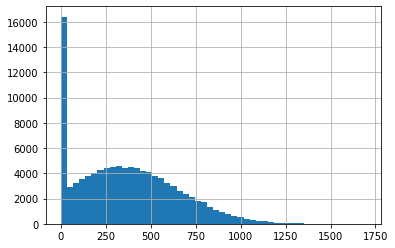

In [45]:
# At last let's look at the mb_used with zero sessions and without
internet['mb_used'].hist(bins=50)

Again we see that there is a high outlier bin

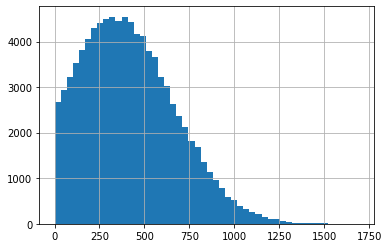

In [46]:
internet.query('mb_used != mb_used.min()')['mb_used'].hist(bins=50)

Let's replace zero mb_used values with 1 megabyte

In [47]:
internet['mb_used'] = internet['mb_used'].replace(0, 1)

In [48]:
# Let's save the calls table with the missing calls replaced with 1 minute calls
# in case we want to do analytics with them
calls_without_missing_calls = calls.query('duration != duration.min()').copy()
calls['duration'] = calls['duration'].replace(0, 1)
calls_with_missing_calls = calls.copy()
calls = calls_without_missing_calls

### Let's do some calculation with respect to each user:

- The number of calls
- The minutes used per month
- The number of text message send per month
- The volume of data per month

In [49]:
# let's create month column
calls['month'] = calls['call_date'].dt.month

In [50]:
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [51]:
# We will do parallel calculations with 'missing_calls'
calls_with_missing_calls['month'] = calls_with_missing_calls['call_date'].dt.month

In [52]:
calls_with_missing_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [53]:
customers_number_calls_statistics = calls.pivot_table(index='user_id', columns=['month'], values='duration', aggfunc='count')
customers_number_minutes_statistics = calls.pivot_table(index='user_id', columns=['month'], values='duration', aggfunc='sum')

In [54]:
customers_number_calls_with_missing_statistics = calls_with_missing_calls.pivot_table(index='user_id', columns=['month'], values='duration', aggfunc='count')
customers_number_minutes_with_missing_statistics = calls_with_missing_calls.pivot_table(index='user_id', columns=['month'], values='duration', aggfunc='sum')

In [55]:
customers_number_calls_statistics.columns = ['calls_{}'.format(i) for i in range(1, 13)]
customers_number_minutes_statistics.columns = ['minutes_{}'.format(i) for i in range(1, 13)]

In [56]:
customers_number_calls_with_missing_statistics.columns = ['calls_{}'.format(i) for i in range(1, 13)]
customers_number_minutes_with_missing_statistics.columns = ['minutes_{}'.format(i) for i in range(1, 13)]

In [57]:
# To display all dataframe columns
pd.options.display.max_columns = None

In [58]:
customers_number_calls_statistics.head()

,calls_1,calls_2,calls_3,calls_4,calls_5,calls_6,calls_7,calls_8,calls_9,calls_10,calls_11,calls_12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,38.0,47.0,49.0,46.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,48.0,38.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0
1004,NaN,NaN,NaN,NaN,19.0,33.0,45.0,42.0,32.0,47.0,45.0,43.0


In [59]:
customers_number_calls_with_missing_statistics.head()

,calls_1,calls_2,calls_3,calls_4,calls_5,calls_6,calls_7,calls_8,calls_9,calls_10,calls_11,calls_12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,49.0,65.0,64.0,56.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,55.0,47.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0
1004,NaN,NaN,NaN,NaN,21.0,44.0,49.0,49.0,42.0,61.0,54.0,50.0


In [60]:
customers_number_minutes_statistics.head()

,minutes_1,minutes_2,minutes_3,minutes_4,minutes_5,minutes_6,minutes_7,minutes_8,minutes_9,minutes_10,minutes_11,minutes_12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.83
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.14,297.69,374.11,404.59,392.93
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.13,359.76,363.24
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1041.00
1004,NaN,NaN,NaN,NaN,181.58,261.32,358.45,334.86,284.60,341.63,452.98,403.53


In [61]:
customers_number_minutes_with_missing_statistics.head()

,minutes_1,minutes_2,minutes_3,minutes_4,minutes_5,minutes_6,minutes_7,minutes_8,minutes_9,minutes_10,minutes_11,minutes_12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.83
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.14,308.69,392.11,419.59,402.93
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.13,366.76,372.24
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1072.00
1004,NaN,NaN,NaN,NaN,183.58,272.32,362.45,341.86,294.60,355.63,461.98,410.53


We see that the number of calls and the minutes number increased not so big, but let's wait until t-test

In [62]:
# Now let's do the same with the messages
messages['month'] = messages['message_date'].dt.month

In [63]:
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [64]:
# To count the number of messages per user per month let's create a helper column
messages.loc[:, 'message'] = 1

In [65]:
customers_messages_statistics = messages.pivot_table(index='user_id', columns='month', values='message', aggfunc='count')

In [66]:
customers_messages_statistics.columns = ['messages_{}'.format(i) for i in range(1, 13)]

In [67]:
customers_messages_statistics.head()

,messages_1,messages_2,messages_3,messages_4,messages_5,messages_6,messages_7,messages_8,messages_9,messages_10,messages_11,messages_12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,44.0,53.0,36.0,44.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,32.0,41.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
1004,NaN,NaN,NaN,NaN,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0


In [68]:
# For the internet
internet['month'] = internet['session_date'].dt.month

In [69]:
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,1.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [70]:
customers_internet_statistics = internet.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc='sum')

In [71]:
customers_internet_statistics.columns = ['internet_{}'.format(i) for i in range(1, 13)]

In [72]:
customers_internet_statistics.head()

,internet_1,internet_2,internet_3,internet_4,internet_5,internet_6,internet_7,internet_8,internet_9,internet_10,internet_11,internet_12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902.47
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6923.15,13327.82,22338.49,18507.30,19376.18
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6558.01,19353.08,14410.24
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27045.14
1004,NaN,NaN,NaN,NaN,6550.21,20687.82,24525.62,27983.74,18860.72,14550.63,21863.78,21392.29


We can see that there are many NaN values in the tables. It seems like users haven't been Megaline clients in these months.

Now let's merge all the tables and calculate the profit

In [73]:
# At first let's look at the size of the tables
print('the number of calls users (without missing calls): {}'.format(customers_number_calls_statistics.shape[0]))
print('the number of calls users (with missing calls): {}'.format(customers_number_calls_with_missing_statistics.shape[0]))
print('the number of messages users: {}'.format(customers_messages_statistics.shape[0]))
print('the number of internet users: {}'.format(customers_internet_statistics.shape[0]))

the number of calls users (without missing calls): 481
the number of calls users (with missing calls): 481
the number of messages users: 402
the number of internet users: 489


There is no any user with only 'missing calls'

We see that there are different numbers of users and may be some users use only messages or only calls. So we need to merge them outer (In merge table there will be all the users which use at least one Megaline service)

In [74]:
full_stat = (users
    .merge(plans, left_on='tariff', right_on='plan_name', how='left')
    .merge(customers_number_calls_statistics, on='user_id', how='left')
    .merge(customers_number_minutes_statistics, on='user_id', how='left')
    .merge(customers_messages_statistics, on='user_id', how='left')
    .merge(customers_internet_statistics, on='user_id', how='left'))

In [75]:
full_stat_with_missing_calls = (users
    .merge(plans, left_on='tariff', right_on='plan_name', how='left')
    .merge(customers_number_calls_with_missing_statistics, on='user_id', how='left')
    .merge(customers_number_minutes_with_missing_statistics, on='user_id', how='left')
    .merge(customers_messages_statistics, on='user_id', how='left')
    .merge(customers_internet_statistics, on='user_id', how='left'))

In [76]:
full_stat.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,calls_1,calls_2,calls_3,calls_4,calls_5,calls_6,calls_7,calls_8,calls_9,calls_10,calls_11,calls_12,minutes_1,minutes_2,minutes_3,minutes_4,minutes_5,minutes_6,minutes_7,minutes_8,minutes_9,minutes_10,minutes_11,minutes_12,messages_1,messages_2,messages_3,messages_4,messages_5,messages_6,messages_7,messages_8,messages_9,messages_10,messages_11,messages_12,internet_1,internet_2,internet_3,internet_4,internet_5,internet_6,internet_7,internet_8,internet_9,internet_10,internet_11,internet_12
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902.47
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,38.0,47.0,49.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.14,297.69,374.11,404.59,392.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,44.0,53.0,36.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6923.15,13327.82,22338.49,18507.30,19376.18
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,48.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.13,359.76,363.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,32.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6558.01,19353.08,14410.24
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1041.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27045.14
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,NaN,NaN,NaN,NaN,19.0,33.0,45.0,42.0,32.0,47.0,45.0,43.0,NaN,NaN,NaN,NaN,181.58,261.32,358.45,334.86,284.60,341.63,452.98,403.53,NaN,NaN,NaN,NaN,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0,NaN,NaN,NaN,NaN,6550.21,20687.82,24525.62,27983.74,18860.72,14550.63,21863.78,21392.29


In [77]:
full_stat_with_missing_calls.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,calls_1,calls_2,calls_3,calls_4,calls_5,calls_6,calls_7,calls_8,calls_9,calls_10,calls_11,calls_12,minutes_1,minutes_2,minutes_3,minutes_4,minutes_5,minutes_6,minutes_7,minutes_8,minutes_9,minutes_10,minutes_11,minutes_12,messages_1,messages_2,messages_3,messages_4,messages_5,messages_6,messages_7,messages_8,messages_9,messages_10,messages_11,messages_12,internet_1,internet_2,internet_3,internet_4,internet_5,internet_6,internet_7,internet_8,internet_9,internet_10,internet_11,internet_12
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902.47
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,49.0,65.0,64.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.14,308.69,392.11,419.59,402.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,44.0,53.0,36.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6923.15,13327.82,22338.49,18507.30,19376.18
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,55.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.13,366.76,372.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,32.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6558.01,19353.08,14410.24
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1072.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27045.14
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,50,15360,500,20,10,0.03,0.03,surf,NaN,NaN,NaN,NaN,21.0,44.0,49.0,49.0,42.0,61.0,54.0,50.0,NaN,NaN,NaN,NaN,183.58,272.32,362.45,341.86,294.60,355.63,461.98,410.53,NaN,NaN,NaN,NaN,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0,NaN,NaN,NaN,NaN,6550.21,20687.82,24525.62,27983.74,18860.72,14550.63,21863.78,21392.29


In [78]:
# Let's calculate user per month profir
def calculate_user_profit(user):
    profits_per_month = []
    for month_number in range(1, 13):
        profits_per_month.append(calculate_monthly_profit(user, month_number))
    return profits_per_month

def calculate_monthly_profit(user, month_number):
    reg_date = user['reg_date']
    churn_date = user['churn_date']
    # If user is not a Megaline customer, return NaN
    if month_number < reg_date.month or month_number >= churn_date.month:
        return np.nan
    
    monthly_profit = user['usd_monthly_pay'] # Minimal profit
    
    # additional argument
    minutes_profit = calculate_monthly_minutes_profit(user, month_number)
    
    messages_profit = calculate_monthly_messages_profit(user, month_number)
    
    internet_profit = calculate_monthly_internet_profit(user, month_number)
    
    monthly_profit = monthly_profit + minutes_profit + messages_profit + internet_profit
    return monthly_profit

def calculate_monthly_minutes_profit(user, month_number):
    exceeded_minutes = user['minutes_{}'.format(month_number)] - user['minutes_included']
    return exceeded_minutes * user['usd_per_minute'] if exceeded_minutes > 0 else 0

def calculate_monthly_messages_profit(user, month_number):
    exceeded_messages = user['messages_{}'.format(month_number)] - user['messages_included']
    return exceeded_messages * user['usd_per_message'] if exceeded_messages > 0 else 0

def calculate_monthly_internet_profit(user, month_number):
    exceeded_internet = user['internet_{}'.format(month_number)] - user['mb_per_month_included']
    return exceeded_internet / 1000 * user['usd_per_gb'] if exceeded_internet > 0 else 0
    

In [79]:
profit_columns = ['monthly_profit_{}'.format(i) for i in range(1, 13)]

In [80]:
full_stat[profit_columns] = full_stat.apply(calculate_user_profit, axis=1, result_type='expand')

In [81]:
full_stat_with_missing_calls[profit_columns] = full_stat.apply(calculate_user_profit, axis=1, result_type='expand')

In [82]:
full_stat.head()[profit_columns]

,monthly_profit_1,monthly_profit_2,monthly_profit_3,monthly_profit_4,monthly_profit_5,monthly_profit_6,monthly_profit_7,monthly_profit_8,monthly_profit_9,monthly_profit_10,monthly_profit_11,monthly_profit_12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0000,20.0000,89.8749,51.4730,60.1618
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0000,59.9308,20.0000
3,20.0,20.0,20.0,20.0,20.0,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,153.0814
4,NaN,NaN,NaN,NaN,20.0,73.2782,111.6562,146.2374,55.0072,20.0000,85.0378,80.3229


In [83]:
full_stat_with_missing_calls.head()[profit_columns]

,monthly_profit_1,monthly_profit_2,monthly_profit_3,monthly_profit_4,monthly_profit_5,monthly_profit_6,monthly_profit_7,monthly_profit_8,monthly_profit_9,monthly_profit_10,monthly_profit_11,monthly_profit_12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0000,20.0000,89.8749,51.4730,60.1618
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0000,59.9308,20.0000
3,20.0,20.0,20.0,20.0,20.0,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,153.0814
4,NaN,NaN,NaN,NaN,20.0,73.2782,111.6562,146.2374,55.0072,20.0000,85.0378,80.3229


At first glance there is no any difference between approaches. Let's dive deeper 

In [84]:
columns =  ['user_id'] + profit_columns

In [85]:
customers_monthly_profit = full_stat[columns].copy()

In [86]:
customers_monthly_profit_with_missing_calls = full_stat_with_missing_calls[columns].copy()

In [87]:
# Round up to 2 decimal places (0 to 99 cents)
customers_monthly_profit = customers_monthly_profit.round(2)

In [88]:
customers_monthly_profit_with_missing_calls = customers_monthly_profit_with_missing_calls.round(2)

In [89]:
customers_monthly_profit.head()

,user_id,monthly_profit_1,monthly_profit_2,monthly_profit_3,monthly_profit_4,monthly_profit_5,monthly_profit_6,monthly_profit_7,monthly_profit_8,monthly_profit_9,monthly_profit_10,monthly_profit_11,monthly_profit_12
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,20.00,89.87,51.47,60.16
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,59.93,20.00
3,1003,20.0,20.0,20.0,20.0,20.0,20.00,20.00,20.00,20.00,20.00,20.00,153.08
4,1004,NaN,NaN,NaN,NaN,20.0,73.28,111.66,146.24,55.01,20.00,85.04,80.32


In [90]:
customers_monthly_profit_with_missing_calls.head()

,user_id,monthly_profit_1,monthly_profit_2,monthly_profit_3,monthly_profit_4,monthly_profit_5,monthly_profit_6,monthly_profit_7,monthly_profit_8,monthly_profit_9,monthly_profit_10,monthly_profit_11,monthly_profit_12
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,20.00,89.87,51.47,60.16
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,59.93,20.00
3,1003,20.0,20.0,20.0,20.0,20.0,20.00,20.00,20.00,20.00,20.00,20.00,153.08
4,1004,NaN,NaN,NaN,NaN,20.0,73.28,111.66,146.24,55.01,20.00,85.04,80.32


Now we have full_stat table for both users with and without missing calls. Let's leave the first one as is until our monthly profit tests.

## Step 3. Analyze the data

In [91]:
# Let's get users which didn't use Megaline services
not_na_user_ids = customers_monthly_profit.dropna(subset=profit_columns, how='all')['user_id']

na_users = customers_monthly_profit.query('user_id not in @not_na_user_ids')

In [92]:
na_users

,user_id,monthly_profit_1,monthly_profit_2,monthly_profit_3,monthly_profit_4,monthly_profit_5,monthly_profit_6,monthly_profit_7,monthly_profit_8,monthly_profit_9,monthly_profit_10,monthly_profit_11,monthly_profit_12
40,1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,1180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Let's check users with this ids
na_user_ids = na_users['user_id']
users.query('user_id.isin(@na_user_ids)')

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
180,1180,Wonda,Hays,24,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-01,surf,2018-12-22
186,1186,Josiah,Douglas,55,"Las Vegas-Henderson-Paradise, NV MSA",2018-12-22,ultimate,2018-12-31


We see that these 3 users didn't use any Megaline services because they were the company clients between 1 and 3 weeks in one month.

We should call them and ask why they don't want use our service and what we need to improve.

In [94]:
# Let's look at the churn customers
churn_customers = users.query('not churn_date.isna()').copy()

In [95]:
print('The number of the churn customers: {}'.format(churn_customers.shape[0]))

The number of the churn customers: 34


In [96]:
churn_customers.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07


In [97]:
# Let's see how long churn customers were Megaline clients
churn_customers['period_of_use'] = churn_customers['churn_date'] - churn_customers['reg_date']

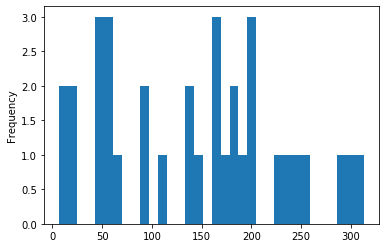

In [98]:
(churn_customers['period_of_use'].astype('timedelta64[h]') / 24).plot.hist(bins=churn_customers.shape[0])

In [99]:
churn_customers['period_of_use'].describe()

count                          34
mean     141 days 15:31:45.882352
std       88 days 11:09:34.657552
min               7 days 00:00:00
25%              59 days 00:00:00
50%             152 days 00:00:00
75%             200 days 06:00:00
max             313 days 00:00:00
Name: period_of_use, dtype: object

I can't see any pattern in these churn customers. Some customers leave Megaline almost instantly and other ones do it after a long usage period

### Analyze customers' behaviour

Now let's look at the minutes, messages and megabytes require per month

At first let's plot density histograms for every month, then calculate average usage for all period and plot average density histogram 

In [100]:
def plot_year_density_histograms(table, service_type):
    service_to_column = {
        'calls': 'minutes_{}',
        'messages': 'messages_{}',
        'internet': 'internet_{}',
        'profit': 'monthly_profit_{}'
    }
    rows, cols = 4, 3
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 15))
    for i in range(rows):
        for j in range(cols):
            month_number = (i+1) * (j+1)
            ax[i, j].hist(table[service_to_column[service_type].format(month_number)], density=True, alpha=0.7)
            try:
                table[service_to_column[service_type].format(month_number)].plot.kde(ax=ax[i, j], color='red')
            except ValueError:  # if there is only 1 value in sample
                continue

In [101]:
# Separate surf and ultimate users
surf_users = full_stat.query('plan_name == "surf"').copy()
ultimate_users = full_stat.query('plan_name == "ultimate"').copy()

### CALLS

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


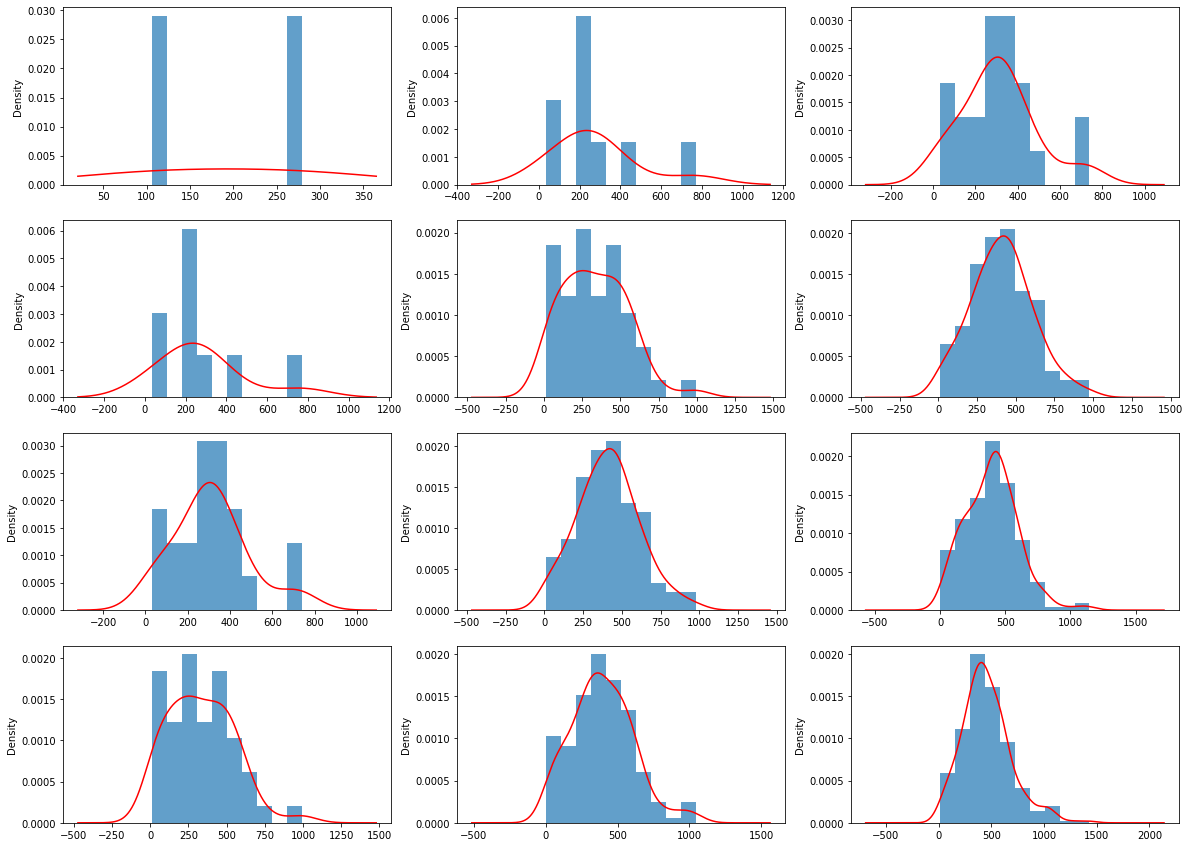

In [102]:
plot_year_density_histograms(surf_users, 'calls')

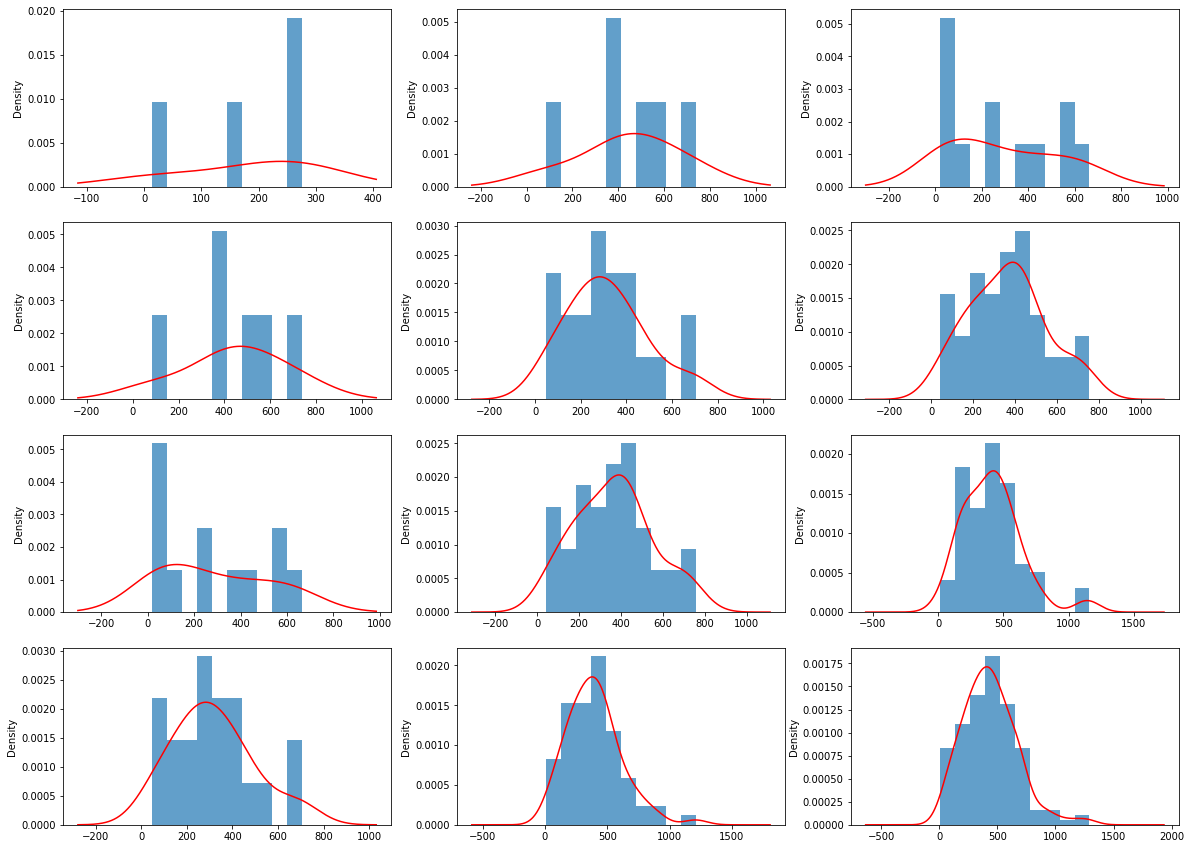

In [103]:
plot_year_density_histograms(ultimate_users, 'calls')

#### GENERAL HISTOGRAMS FOR SURF AND ULTIMATE USERS: CALLS

In [104]:
surf_users_calls_mean = surf_users.loc[:, 'calls_1':'calls_12'].mean(axis=1)
ultimate_users_calls_mean = ultimate_users.loc[:, 'calls_1':'calls_12'].mean(axis=1)

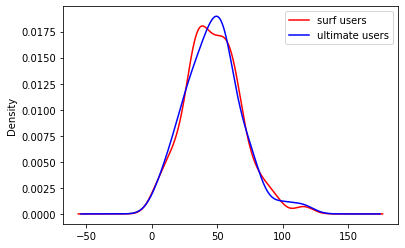

In [105]:
ax = surf_users_calls_mean.plot.kde(color='red', label='surf users')
ultimate_users_calls_mean.plot.kde(ax=ax, color='blue', label='ultimate users')
ax.legend()

Density histograms for both types of tariffs seems very similar. It looks like that users calls duration are equal in average and it doesn't depend on tariff plan.

In [106]:
# Let's look at the descriptive statistics
surf_users_calls_mean.describe()

count    326.000000
mean      46.955446
std       21.274306
min        2.000000
25%       32.812500
50%       45.750000
75%       60.850000
max      118.222222
dtype: float64

In [107]:
ultimate_users_calls_mean.describe()

count    155.000000
mean      47.000956
std       21.603226
min        3.000000
25%       31.666667
50%       46.142857
75%       57.732143
max      117.200000
dtype: float64

If we look at the statistics then we see that they are not so different. Moreover it seems like ultimate users use calls less than surf users.

### CALLS WITH "MISSING"

In [108]:
surf_users_with_missing_calls = full_stat_with_missing_calls.query('plan_name == "surf"')
ultimate_users_with_missing_calls = full_stat_with_missing_calls.query('plan_name == "ultimate"')

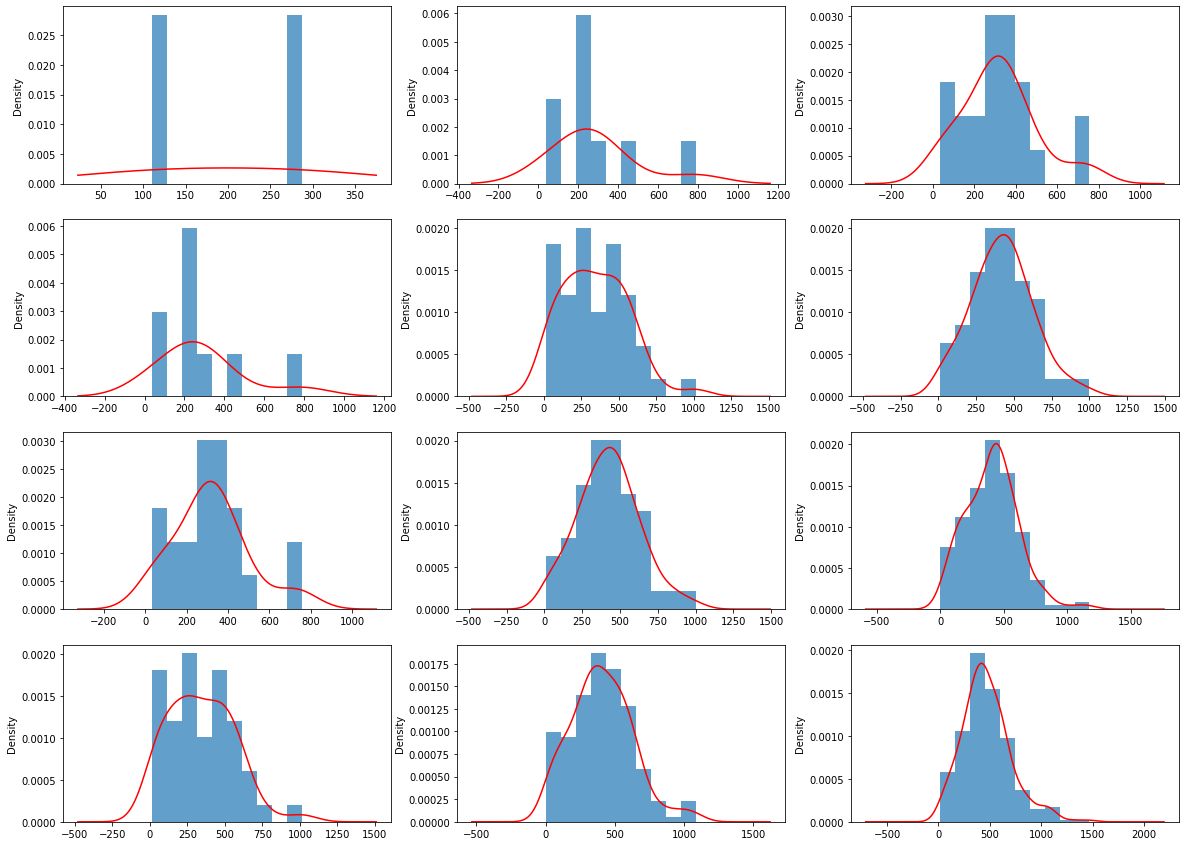

In [109]:
plot_year_density_histograms(surf_users_with_missing_calls, 'calls')

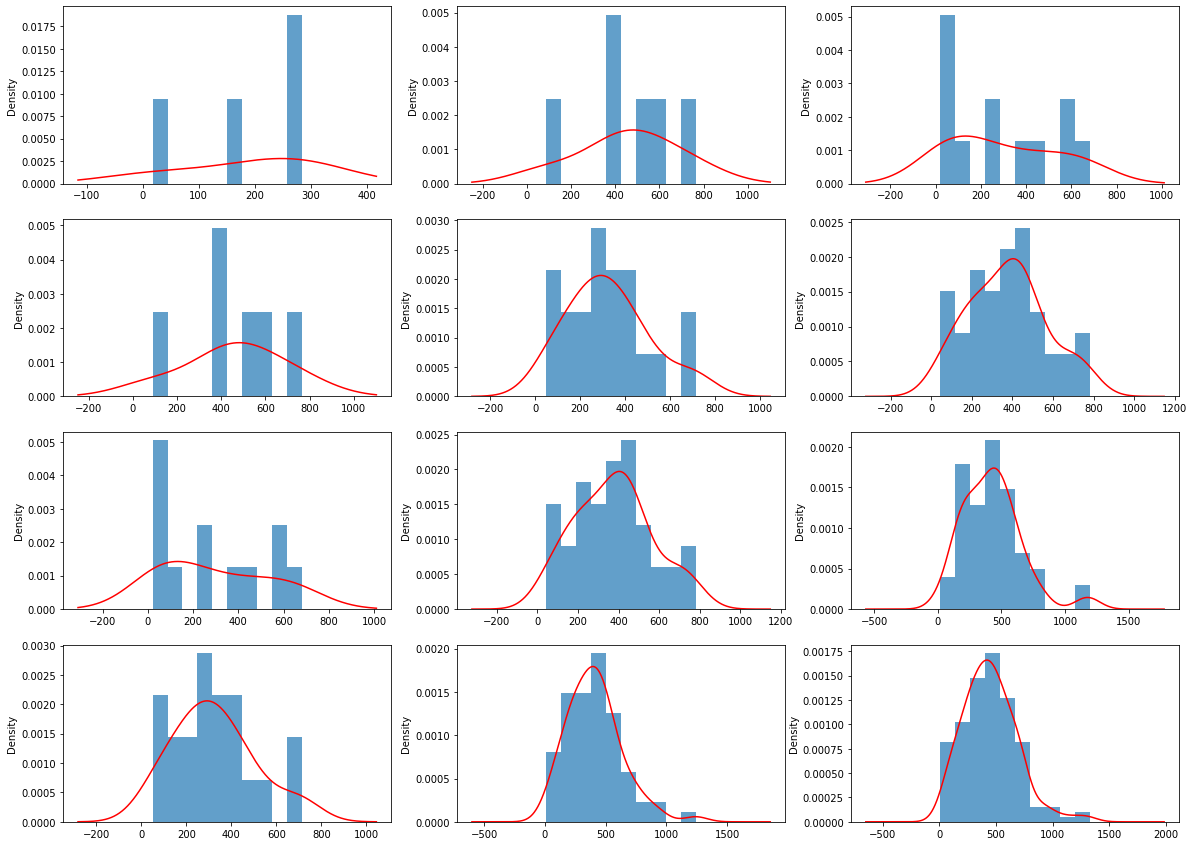

In [110]:
plot_year_density_histograms(ultimate_users_with_missing_calls, 'calls')

#### GENERAL HISTOGRAMS FOR SURF AND ULTIMATE USERS: CALLS WITH MISSING

In [111]:
surf_users_calls_with_missing_mean = surf_users_with_missing_calls.loc[:, 'calls_1':'calls_12'].mean(axis=1)
ultimate_users_calls_with_missing_mean = ultimate_users_with_missing_calls.loc[:, 'calls_1':'calls_12'].mean(axis=1)

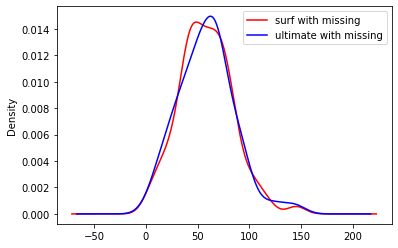

In [112]:
ax = surf_users_calls_with_missing_mean.plot.kde(color='red', label='surf with missing')
ultimate_users_calls_with_missing_mean.plot.kde(color='blue', label='ultimate with missing', ax=ax)
ax.legend()

In [113]:
surf_users_calls_with_missing_mean.describe()

count    326.000000
mean      58.120553
std       26.167260
min        2.000000
25%       41.000000
50%       57.000000
75%       74.000000
max      149.000000
dtype: float64

In [114]:
ultimate_users_calls_with_missing_mean.describe()

count    155.000000
mean      58.439425
std       27.128911
min        4.000000
25%       38.000000
50%       58.000000
75%       72.000000
max      146.000000
dtype: float64

Let's look at the general plot for surf and ultimate users

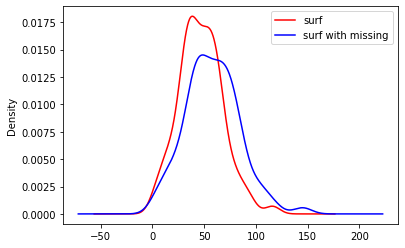

In [115]:
ax = surf_users_calls_mean.plot.kde(color='red', label='surf')
surf_users_calls_with_missing_mean.plot.kde(color='blue', label='surf with missing')
ax.legend()
plt.show()

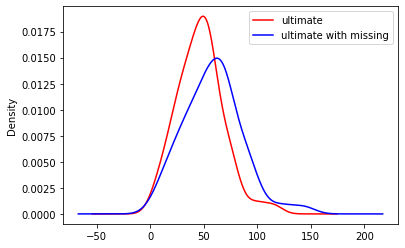

In [116]:
ax = ultimate_users_calls_mean.plot.kde(color='red', label='ultimate')
ultimate_users_calls_with_missing_mean.plot.kde(color='blue', label='ultimate with missing')
ax.legend()
plt.show()

We see that distribution density is more concentrated near mean value (on 5 percent more!) if we assume zero duration calls as real calls

In [117]:
# Let's check are distributions' mean values from one general population
alpha = 0.05

results_surf = st.ttest_ind(
    surf_users_calls_mean.dropna(),
    surf_users_calls_with_missing_mean.dropna(),
)

results_ultimate = st.ttest_ind(
    ultimate_users_calls_mean.dropna(),
    ultimate_users_calls_with_missing_mean.dropna(),
)

print('p-value for surf: {}\n'.format(results_surf.pvalue))
print('p-value for ultimate: {}\n'.format(results_ultimate.pvalue))

if results_surf.pvalue < alpha and results_ultimate.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value for surf: 3.733371140951211e-09

p-value for ultimate: 5.1544328794570813e-05

We reject the null hypothesis


### INTERNET

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


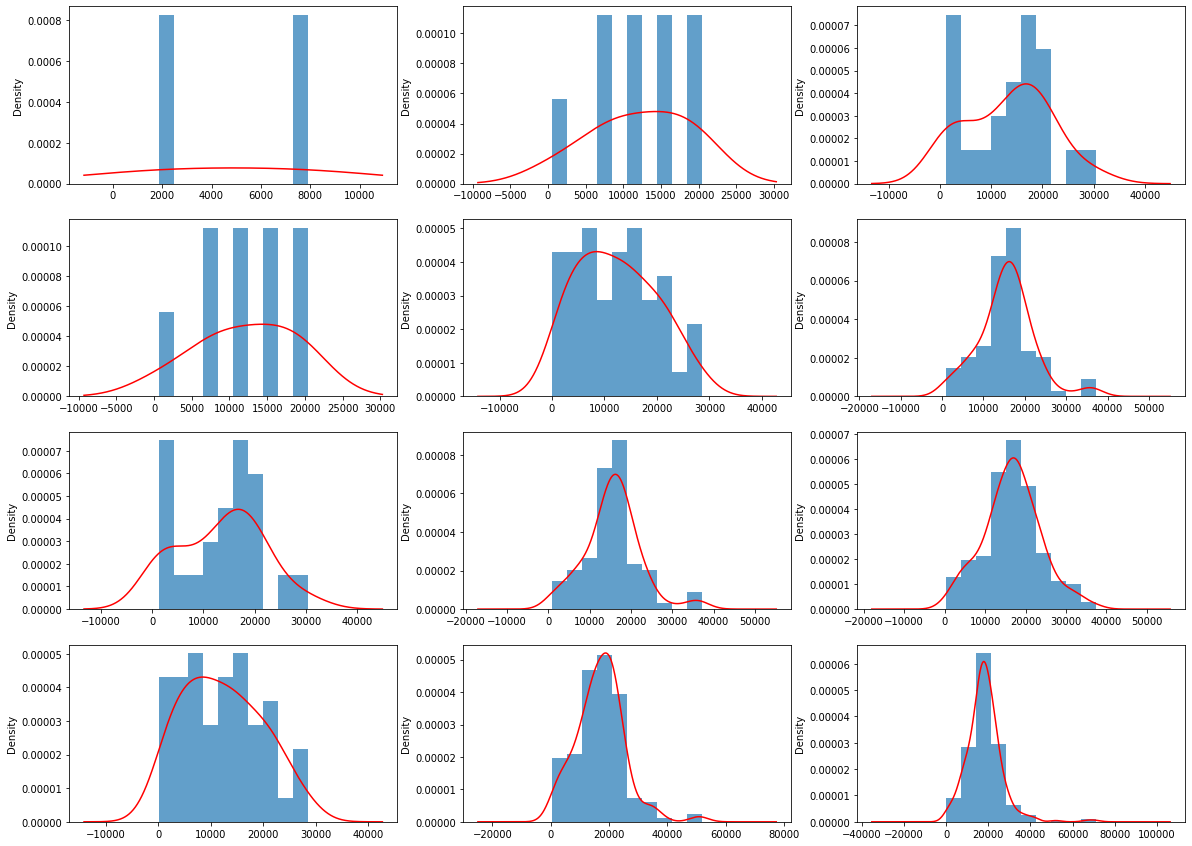

In [118]:
plot_year_density_histograms(surf_users, 'internet')

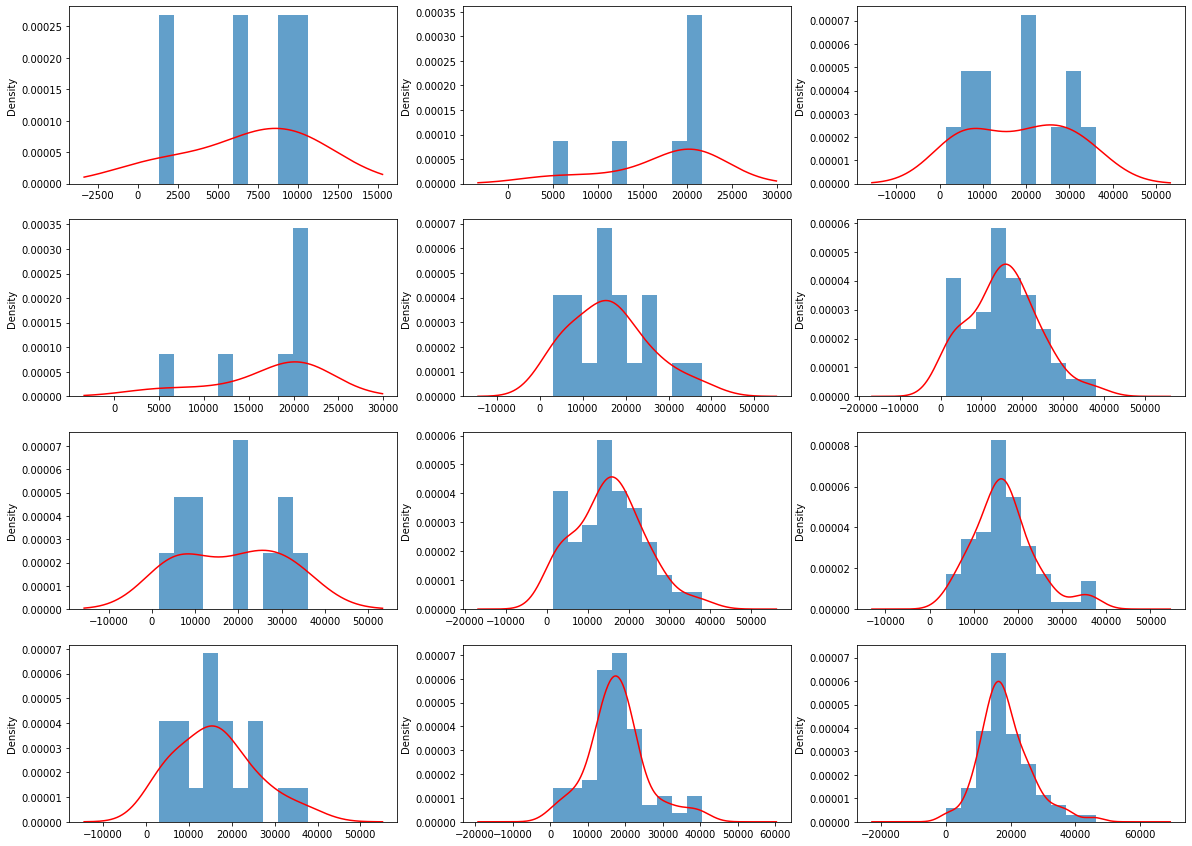

In [119]:
plot_year_density_histograms(ultimate_users, 'internet')

#### GENERAL HISTOGRAMS FOR SURF AND ULTIMATE USERS: INTERNET

In [120]:
surf_users_internet_mean = surf_users.loc[:, 'internet_1':'internet_12'].mean(axis=1)
ultimate_users_internet_mean = ultimate_users.loc[:, 'internet_1':'internet_12'].mean(axis=1)

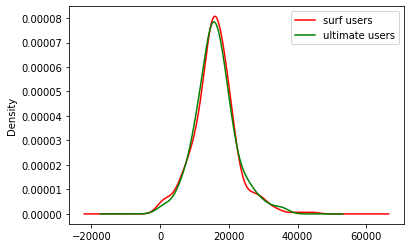

In [121]:
ax = surf_users_internet_mean.plot.kde(color='red', label='surf users')
ultimate_users_internet_mean.plot.kde(color='green', ax=ax, label='ultimate users')
ax.legend()

In [122]:
surf_users_internet_mean.describe()

count      332.000000
mean     15967.618358
std       6144.185479
min         92.680000
25%      12860.966833
50%      15964.008750
75%      19029.294410
max      44356.945000
dtype: float64

In [123]:
ultimate_users_internet_mean.describe()

count      157.000000
mean     16070.332230
std       5883.246846
min        233.170000
25%      12584.927500
50%      15579.513333
75%      18875.363333
max      35471.486364
dtype: float64

### MESSAGES

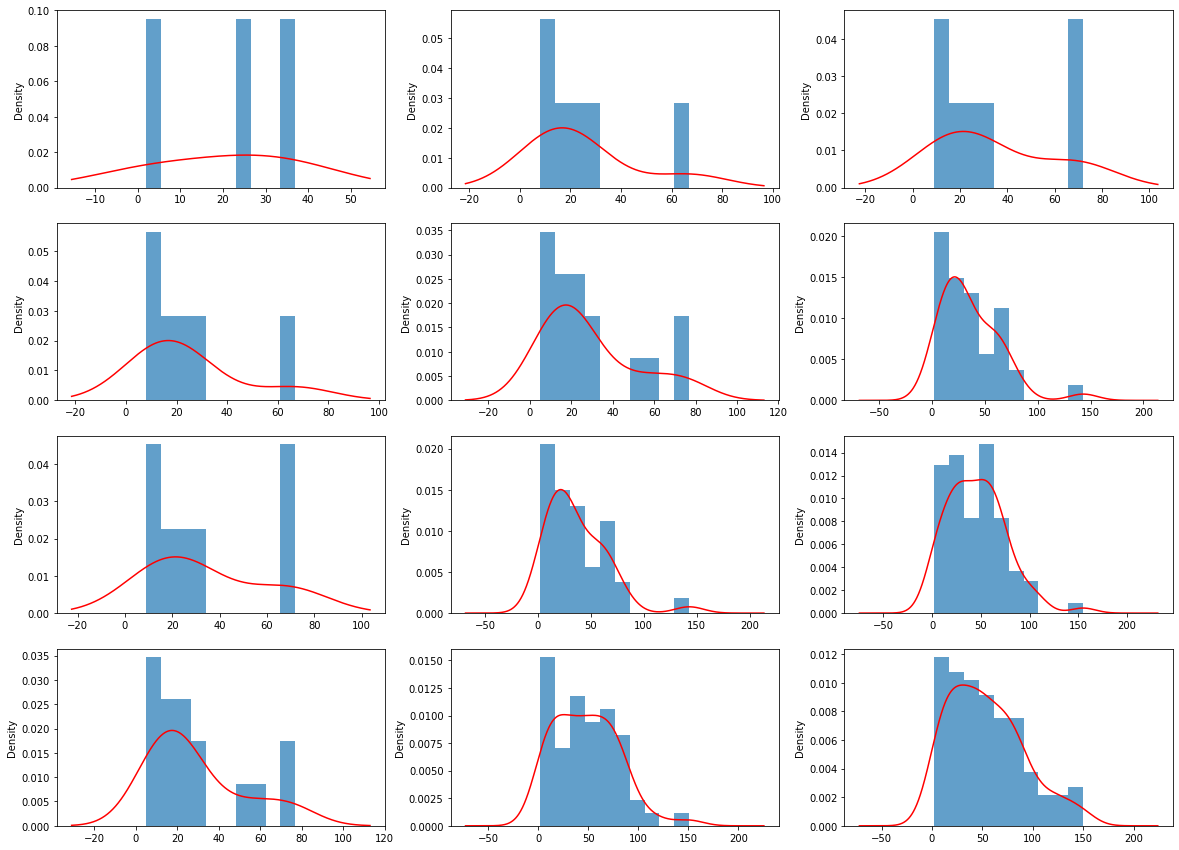

In [124]:
plot_year_density_histograms(ultimate_users, 'messages')

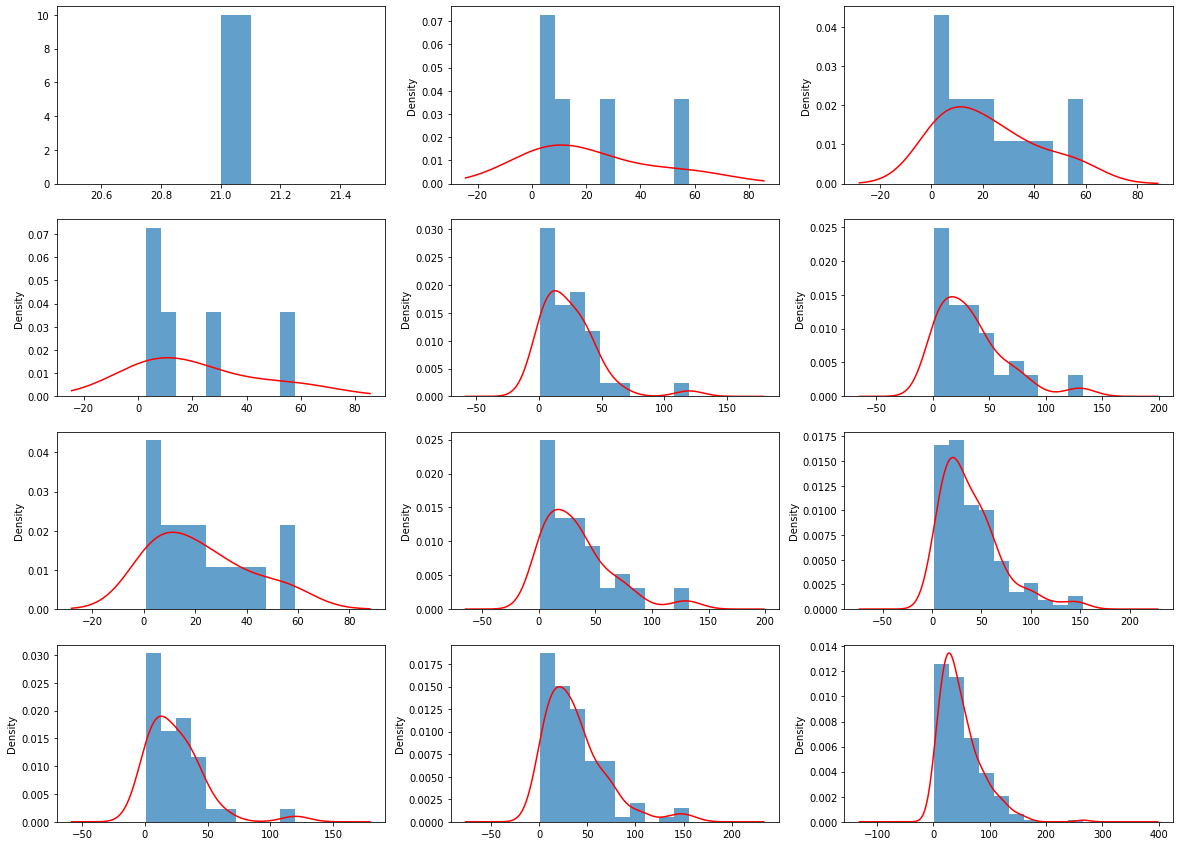

In [125]:
plot_year_density_histograms(surf_users, 'messages')

#### GENERAL HISTOGRAMS FOR SURF AND ULTIMATE USERS: MESSAGES

In [126]:
surf_users_messages_mean = surf_users.loc[:, 'messages_1':'messages_12'].mean(axis=1)
ultimate_users_messages_mean = ultimate_users.loc[:, 'messages_1':'messages_12'].mean(axis=1)

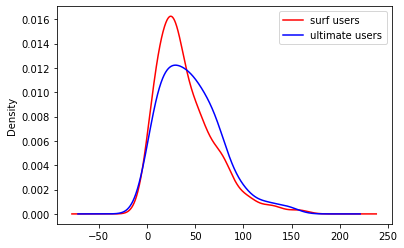

In [127]:
ax = surf_users_messages_mean.plot.kde(color='red', label='surf users')
ultimate_users_messages_mean.plot.kde(color='blue', label='ultimate users', ax=ax)
ax.legend()

In [128]:
surf_users_messages_mean.describe()

count    270.000000
mean      40.137032
std       29.707724
min        1.000000
25%       18.625000
50%       31.333333
75%       55.000000
max      159.000000
dtype: float64

In [129]:
ultimate_users_messages_mean.describe()

count    132.000000
mean      45.805450
std       30.841711
min        1.500000
25%       22.750000
50%       43.000000
75%       64.250000
max      148.000000
dtype: float64

It seems like the average number of messages is different for the tariffs: Ultimate users send more messages in average.

## Step 4. Test the hypotheses

#### The first null hypothesis is that average profit from users of Ultimate and Surf calling plans are equal

In [130]:
excluded_columns = list(plans.columns) + list(users.columns)
excluded_columns.remove('user_id')
excluded_columns.remove('tariff')

In [131]:
# At first let's check it for table without 'missing' calls
monthly_profit = customers_monthly_profit.merge(users, on='user_id', how='left').merge(plans, left_on='tariff', right_on='plan_name', how='left').drop(excluded_columns, axis=1)

In [132]:
# And for the table with missing calls
monthly_profit_with_missing_calls = customers_monthly_profit_with_missing_calls.merge(users, on='user_id', how='left').merge(plans, left_on='tariff', right_on='plan_name', how='left').drop(excluded_columns, axis=1)

In [133]:
def monthly_profit_analysis_with_tariffs(monthly_profit):
    plot_year_density_histograms(monthly_profit, 'profit')
    plt.show(block=False)
    # Let's see profit hist for the year
    ax=monthly_profit.loc[:, 'monthly_profit_1':'monthly_profit_12'].mean(axis=1).plot.kde(color='red', label='average profit')
    ax.legend()
    plt.show(block=False)
    surf_monthly_profit = monthly_profit.query('tariff == "surf"')
    ultimate_monthly_profit = monthly_profit.query('tariff == "ultimate"')
    surf_monthly_profit_mean = surf_monthly_profit.loc[:, 'monthly_profit_1':'monthly_profit_12'].mean(axis=1)
    ultimate_monthly_profit_mean = ultimate_monthly_profit.loc[:, 'monthly_profit_1':'monthly_profit_12'].mean(axis=1)
    ax = surf_monthly_profit_mean.plot.kde(color='red', label='surf average monthly profit')
    ultimate_monthly_profit_mean.plot.kde(color='blue', label='ultimate average monthly profit', ax=ax)
    ax.legend()
    plt.show(block=False)
    test_means_of_2_populations(surf_monthly_profit_mean, ultimate_monthly_profit_mean)

In [134]:
def test_means_of_2_populations(sample_1, sample_2, alpha=0.05):
    
    results = st.ttest_ind(sample_1.dropna(), sample_2.dropna())
    
    print('p-value: {}'.format(results.pvalue))
    
    if results.pvalue < alpha:
        print('We reject the null hypothesis')
    else:
        print("We can't reject the null hypothesis")

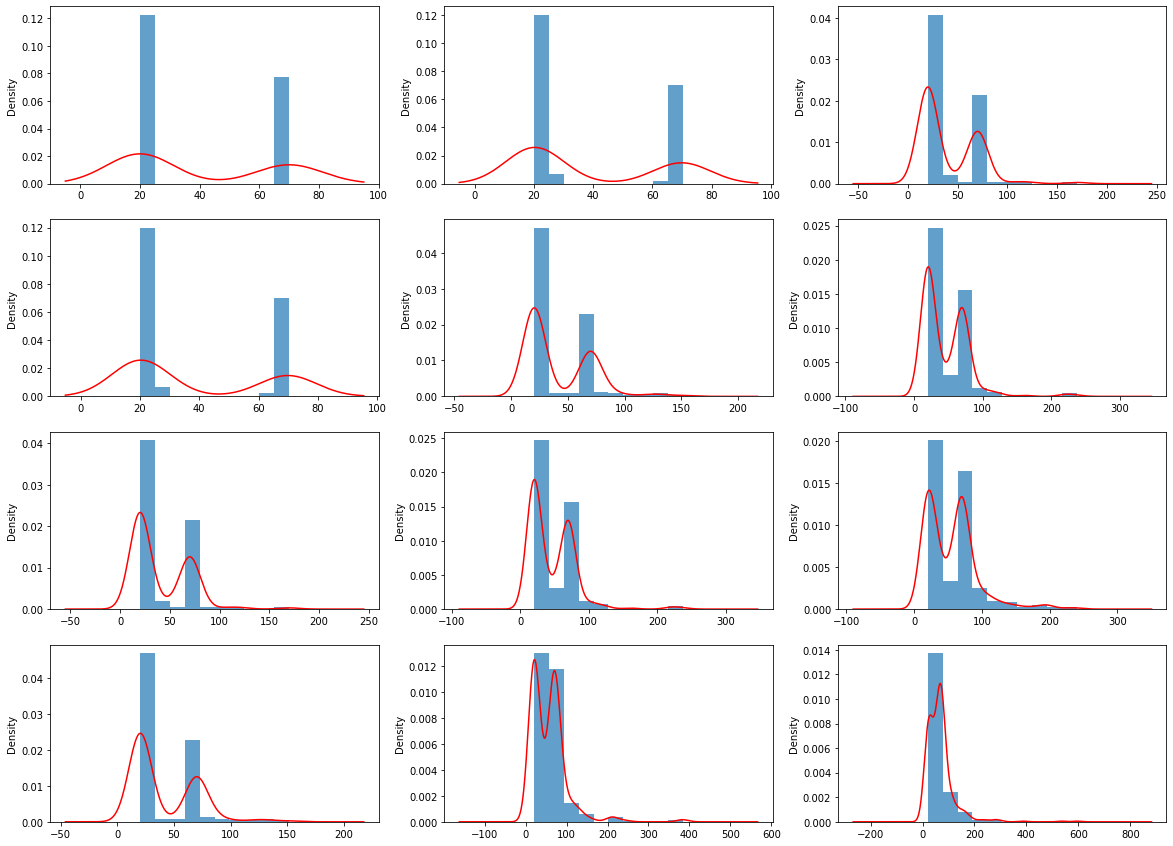

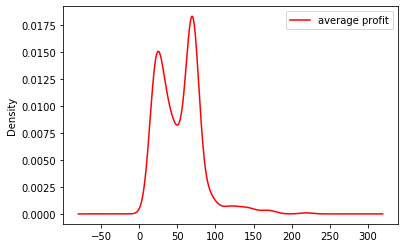

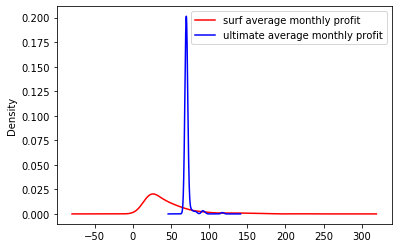

p-value: 1.5193654033996885e-22
We reject the null hypothesis


In [135]:
monthly_profit_analysis_with_tariffs(monthly_profit)

If we check density histogram for monthly profit for ultimate and surf users together then we see that we have deal with two other populations (it is clearly visible in the first months). But near the end of the year these two peaks are became closer.

We see that average are very different because of subscription fee

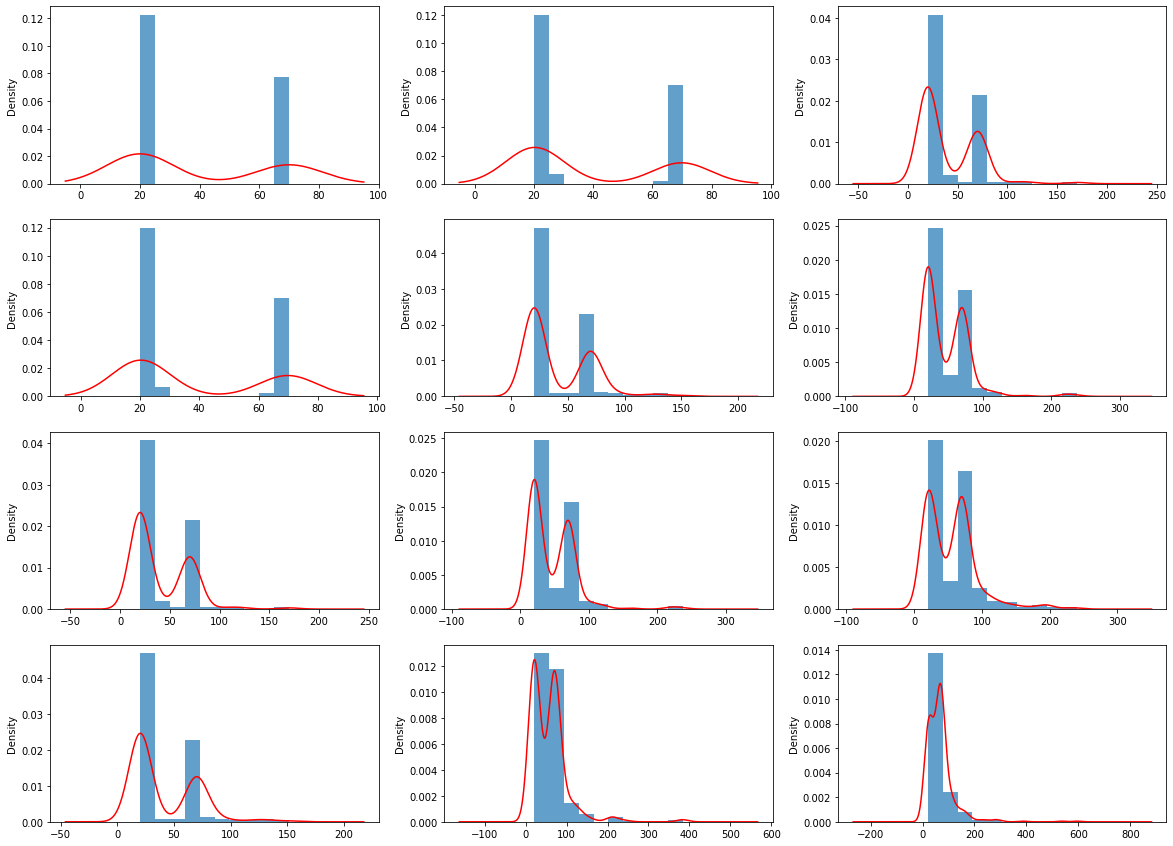

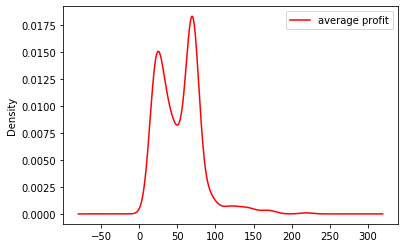

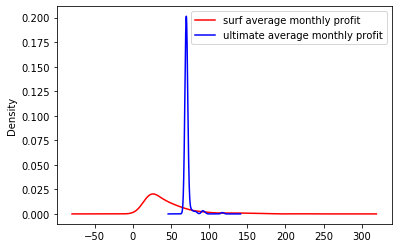

p-value: 1.5193654033996885e-22
We reject the null hypothesis


In [136]:
# Now let's deal the same analysis with considering 'missing' calls
monthly_profit_analysis_with_tariffs(monthly_profit_with_missing_calls)

Our average monthly profit conclusion about t-test doesn't depend on considering missing calls 

**The second null hypothesis is that average monthly profit for users from NY-NJ and from the other regions is the same**

In [137]:
excluded_columns = list(plans.columns) + list(users.columns)
excluded_columns.remove('user_id')
excluded_columns.remove('tariff')
excluded_columns.remove('city')

In [138]:
# As usual let's consider table with and without missing calls
monthly_profit = customers_monthly_profit.merge(users, on='user_id', how='left').merge(plans, left_on='tariff', right_on='plan_name', how='left').drop(excluded_columns, axis=1)
monthly_profit_with_missing_calls = customers_monthly_profit_with_missing_calls.merge(users, on='user_id', how='left').merge(plans, left_on='tariff', right_on='plan_name', how='left').drop(excluded_columns, axis=1)

In [139]:
# We should consider the differences between average profit for each tariff
def monthly_profit_analysis_with_regions(monthly_profit):
    plot_year_density_histograms(monthly_profit, 'profit')
    plt.show(block=False)
    # Let's see profit hist for the year
    ax=monthly_profit.loc[:, 'monthly_profit_1':'monthly_profit_12'].mean(axis=1).plot.kde(color='red', label='average profit')
    ax.legend()
    plt.show(block=False)
    NY_NJ_citizens = monthly_profit['city'].str.match(pat=r'.*NY-NJ.*')
    ny_nj_monthly_profit = monthly_profit[NY_NJ_citizens]
    other_regions_monthly_profit = monthly_profit[~NY_NJ_citizens]
    ny_nj_monthly_profit_mean = ny_nj_monthly_profit.loc[:, 'monthly_profit_1':'monthly_profit_12'].mean(axis=1)
    other_regions_monthly_profit_mean = other_regions_monthly_profit.loc[:, 'monthly_profit_1':'monthly_profit_12'].mean(axis=1)
    ax = ny_nj_monthly_profit_mean.plot.kde(color='red', label='NY-NJ average monthly profit')
    other_regions_monthly_profit_mean.plot.kde(color='blue', label='other regions average monthly profit', ax=ax)
    ax.legend()
    plt.show(block=False)
    test_means_of_2_populations(ny_nj_monthly_profit_mean, other_regions_monthly_profit_mean)

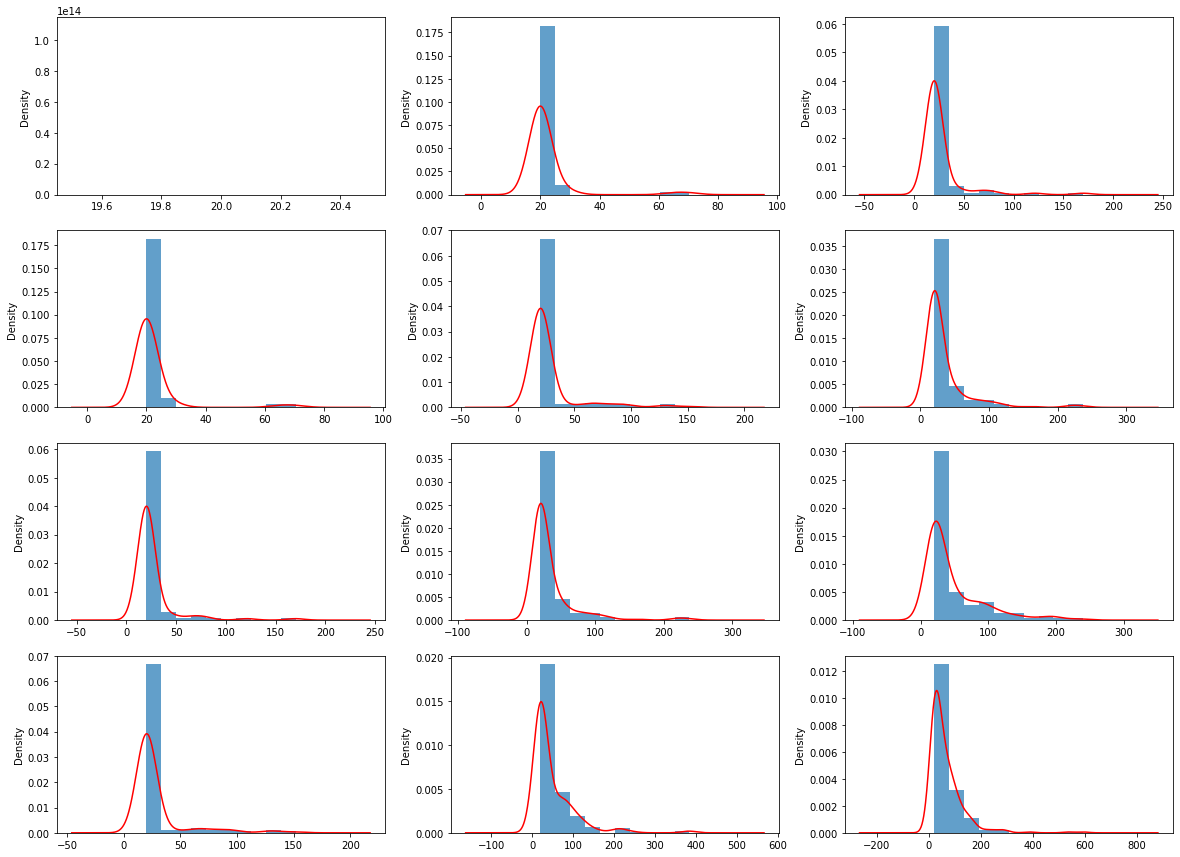

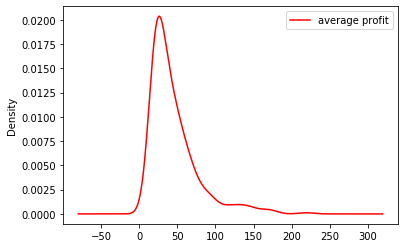

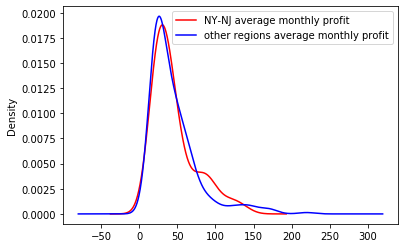

p-value: 0.9410663686493488
We can't reject the null hypothesis


In [140]:
monthly_profit_analysis_with_regions(monthly_profit.query('tariff == "surf"'))

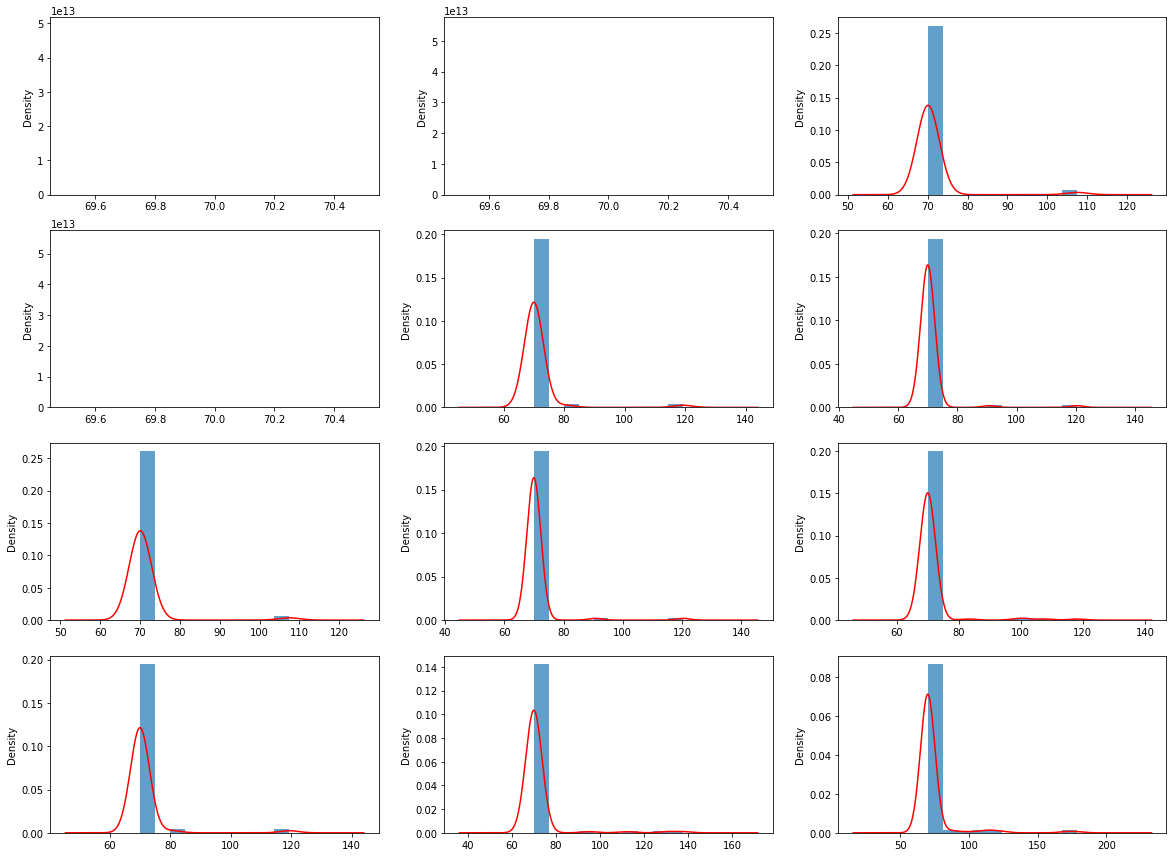

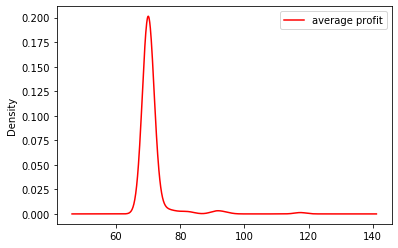

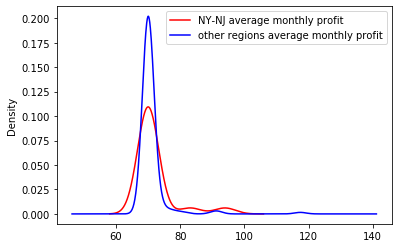

p-value: 0.4731192598089565
We can't reject the null hypothesis


In [141]:
monthly_profit_analysis_with_regions(monthly_profit.query('tariff == "ultimate"'))

## Step 5. Write an overall conclusion

We analysed 500 Megaline clients and tested two hypothesis:

1. There is a difference between average profit between tariffs
2. There is a difference between average profit between NY-NJ and other regions

In the first case there was a significant difference between average profits because of subscription fee
In the second case there was not any significant difference between average profits among other regions.

We can conclude that we must focus on advertising tarif "ultimate" and it doesn't depend on region.